# K-means Clustering Algorithm

Before implementation, let's understand what type of problem we will solve here. So, we have a dataset of Mall_Customers, which is the data of customers who visit the mall and spend there.

In the given dataset, we have **Customer_Id, Gender, Age, Annual Income, and Spending Score** (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent). From this dataset, we need to calculate some patterns, as it is an unsupervised method, so we don't know what to calculate exactly.

### The steps to be followed for the implementation are given below:

- **Data Pre-processing**
- **Finding the optimal number of clusters using the elbow method**
- **Training the K-means algorithm on the training dataset**
- **Visualizing the clusters**

## Step-1: Data pre-processing Step


In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [3]:
# Importing the dataset  
dataset = pd.read_csv('Mall_Customers.csv')  
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Extracting Independent Variables
x = dataset.iloc[:, [3, 4]].values  

## Step-2: Finding the optimal number of clusters using the elbow method
In the second step, we will try to find the optimal number of clusters for our clustering problem. So, as discussed above, here we are going to use the elbow method for this purpose.

As we know, the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. Below is the code for it:

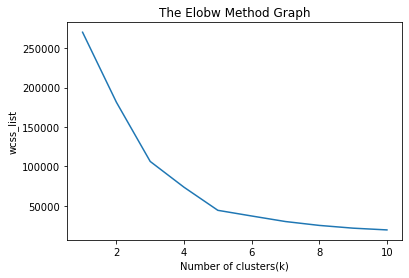

In [5]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
    
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

## From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

## Step- 3: Training the K-means algorithm on the training dataset
As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed. The code is given below:

In [6]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [7]:
y_predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Step-4: Visualizing the Clusters
The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using mtp.scatter() function of matplotlib.



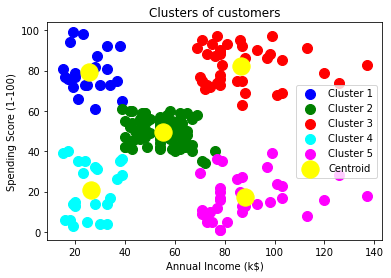

In [10]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()   

The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

- Cluster1 shows the customers with average salary and average spending so we can categorize these customers as **Middle**
- Cluster2 shows the customer has a high income but low spending, so we can categorize them as **careful**.
- Cluster3 shows the low income and also low spending so they can be categorized as **sensible**.
- Cluster4 shows the customers with low income with very high spending so they can be categorized as **careless**.
- Cluster5 shows the customers with high income and high spending so they can be categorized as **target**, and these customers can be the most profitable customers for the mall owner.

So, we can label them as 

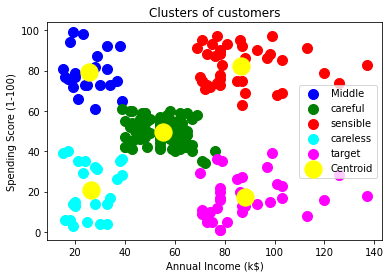

In [11]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Middle') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'careful') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'sensible') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'careless') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'target') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()